In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sb
import re

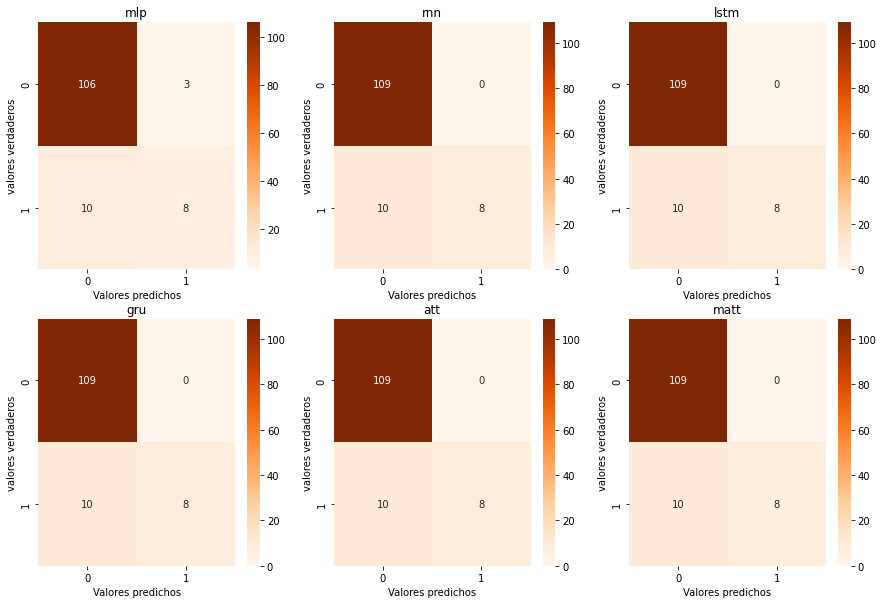

In [5]:
models=[["mlp_20230701-221434","rnn_se20230701-221441","lstm_se20230701-221505"],
        ["gru_se20230701-221547","att_20230701-221627","matt_20230701-221637"]]
fig, axes = plt.subplots(2,3)
fig.set_size_inches(15, 10)
for i in [0,1]:
        for j in [0,1,2]:
                model=models[i][j]
                yv_pred=np.loadtxt("logs/fit/"+model+"/yv_pred.csv",delimiter=";",skiprows=1)
                yv=np.loadtxt("logs/fit/"+model+"/yv.csv",delimiter=";",skiprows=1)
                yv=np.argmax(yv,axis=1)
                yv_pred=np.argmax(yv_pred,axis=1)
                matriz = confusion_matrix(yv, yv_pred)
                ax=axes[i][j]
                sb.heatmap(matriz, annot=True, ax = ax, cmap="Oranges",fmt="d");
                ax.set_xlabel('Valores predichos');ax.set_ylabel('valores verdaderos'); 
                ax.set_title(re.split("(_|-)+",model)[0]);

In [6]:
x_val=np.loadtxt("base_x_val.csv",delimiter="\t",skiprows=0,dtype="str",encoding="utf-8")
df=pd.DataFrame(x_val)
df["y"]=yv
df["yp"]=yv_pred

In [7]:
fn=df[(df["y"]==1) & (df["yp"]==0)]
fn

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,y,yp
13,21/02/2018,1209,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
20,21/02/2018,1204,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
29,21/02/2018,1178,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
52,21/02/2018,1198,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
65,21/02/2018,1191,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
73,21/02/2018,1184,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
78,21/02/2018,1207,0,0,0,2,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
79,21/02/2018,1200,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
97,21/02/2018,1201,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
120,21/02/2018,1179,1,1,1,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,0


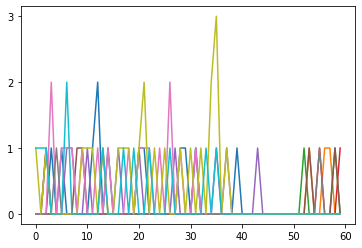

In [8]:
for i in range(10):
    plt.plot([x for x in range(60)],fn.iloc[i,2:62])

In [9]:
tp=df[(df["y"]==1) & (df["yp"]==1)]
tp

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,y,yp
21,22/02/2018,23,48,42,45,53,44,57,53,52,...,84,69,48,49,45,54,53,52,1,1
53,22/02/2018,19,59,64,57,45,50,76,61,62,...,56,60,69,63,68,55,62,63,1,1
64,22/02/2018,9,62,72,80,68,69,79,57,70,...,78,74,86,68,72,72,61,63,1,1
75,21/02/2018,1422,137,175,155,170,152,154,171,170,...,153,163,181,152,167,156,166,168,1,1
91,22/02/2018,5,63,58,75,70,67,73,65,73,...,54,69,82,62,76,56,87,70,1,1
106,22/02/2018,1,66,72,72,68,72,68,77,61,...,60,77,68,63,65,67,74,78,1,1
110,22/02/2018,14,69,63,63,66,65,57,89,57,...,57,55,64,57,80,66,61,55,1,1
121,22/02/2018,13,71,58,62,72,56,66,72,84,...,61,67,74,49,51,69,55,76,1,1


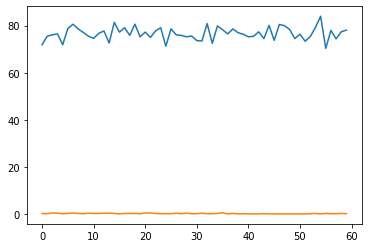

In [10]:
plt.plot([x for x in range(60)],np.mean(tp.iloc[:,2:62].to_numpy(dtype=int),axis=0))
plt.plot([x for x in range(60)],np.mean(fn.iloc[:,2:62].to_numpy(dtype=int),axis=0))

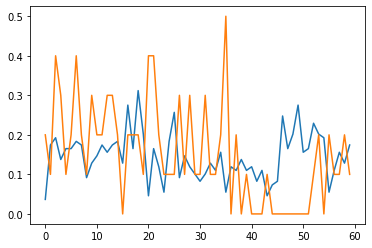

In [15]:
tn=df[(df["y"]==0) & (df["yp"]==0)]
plt.plot([x for x in range(60)],np.mean(tn.iloc[:,2:62].to_numpy(dtype=int),axis=0))
plt.plot([x for x in range(60)],np.mean(fn.iloc[:,2:62].to_numpy(dtype=int),axis=0))

/var/folders/x1/960bftsj63n3p5r_yj461xd00000gn/T/ipykernel_12294/51405186.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


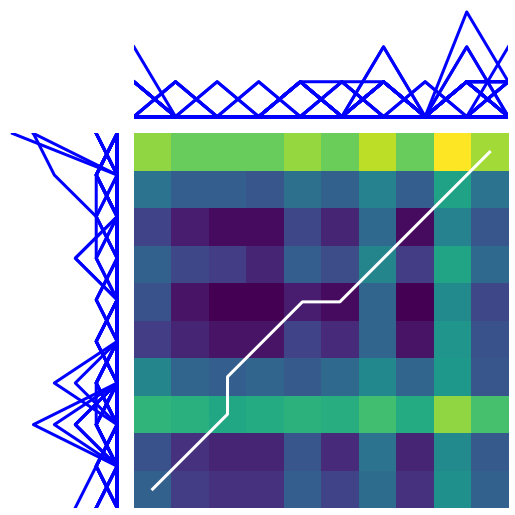

16.583123951777


In [23]:
from scipy.spatial.distance import cdist
from tslearn import metrics

x=np.asarray(tn.iloc[0:10,2:62],dtype=float)
y=np.asarray(fn.iloc[0:10,2:62],dtype=float)
sz = x.shape[0]

path, sim = metrics.dtw_path(x, y)

plt.figure(1, figsize=(8, 8))

# definitions for the axes
left, bottom = 0.01, 0.1
w_ts = h_ts = 0.2
left_h = left + w_ts + 0.02
width = height = 0.65
bottom_h = bottom + height + 0.02

rect_s_y = [left, bottom, w_ts, height]
rect_gram = [left_h, bottom, width, height]
rect_s_x = [left_h, bottom_h, width, h_ts]

ax_gram = plt.axes(rect_gram)
ax_s_x = plt.axes(rect_s_x)
ax_s_y = plt.axes(rect_s_y)

mat = cdist(x, y)

ax_gram.imshow(mat, origin='lower')
ax_gram.axis("off")
ax_gram.autoscale(False)
ax_gram.plot([j for (i, j) in path], [i for (i, j) in path], "w-",
             linewidth=3.)

ax_s_x.plot(np.arange(sz), y, "b-", linewidth=3.)
ax_s_x.axis("off")
ax_s_x.set_xlim((0, sz - 1))

ax_s_y.plot(- x, np.arange(sz), "b-", linewidth=3.)
ax_s_y.axis("off")
ax_s_y.set_ylim((0, sz - 1))

plt.tight_layout()
plt.show()
print(sim)

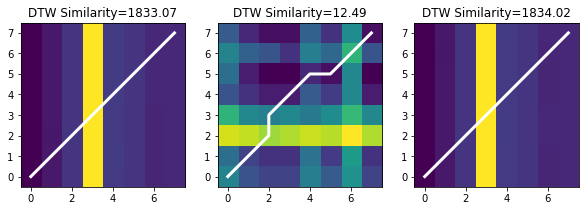

In [46]:
from scipy.spatial.distance import cdist
from tslearn import metrics
tps=np.asarray(tp.iloc[0:8,2:62],dtype=float)
tns=np.asarray(tn.iloc[0:8,2:62],dtype=float)
fns=np.asarray(fn.iloc[0:8,2:62],dtype=float)

x=[tns,tns,fns]
y=[tps,fns,tps]
fig, axes = plt.subplots(1,3)
fig.set_size_inches(10, 10)
for i in range(3):
    path, sim = metrics.dtw_path(x[i], y[i])
    mat = cdist(x[i], y[i])
    axes[i].imshow(mat, origin='lower')
    axes[i].autoscale(False)
    axes[i].plot([j for (i, j) in path], [i for (i, j) in path], "w-",
             linewidth=3.)
    axes[i].set_title("DTW Similarity="+str(round(sim,2)));